In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('clustering_data.csv')

C:\Users\Varun Gopal\AppData\Local\Temp\ipykernel_18852\2067250216.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('clustering_data.csv')


In [3]:
data.head(5)

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5689,77.85624
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5281,77.857014
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.561111,77.85715
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2488,78.2588
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.24555,78.2477


In [16]:
ts_data = data[data['StateName']=='TELANGANA']

In [17]:
ts_pindata = ts_data[['Pincode','Latitude','Longitude']]

In [18]:
predata = ts_pindata
predata = predata[predata['Latitude'].isna()==False]
predata = predata[predata['Longitude'].isna()==False]
predata = predata.drop_duplicates(subset=['Latitude', 'Longitude'])

In [19]:
print(predata.shape)

(3730, 3)


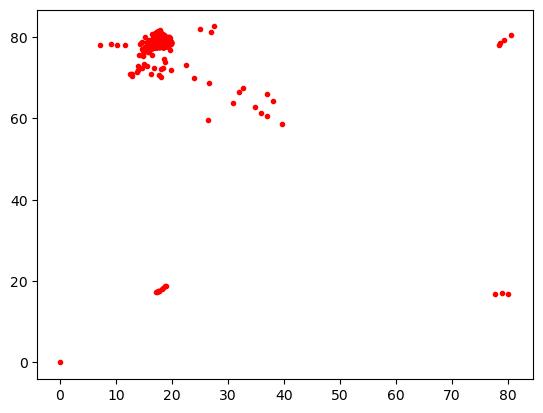

In [20]:
lat=np.array(predata['Latitude'],dtype=float)
lon=np.array(predata['Longitude'],dtype=float)
a = plt.subplot()
a.scatter(lat,lon,color='red',marker='.')
plt.show()

In [21]:
colors=['blue','red','green','orange','yellow','brown','black']

In [22]:
class KMeans:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.labels = None
        
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        for _ in range(self.max_iter):
            self.labels = self._assign_labels(X)
            new_centroids = self._update_centroids(X)
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids
        
    def _assign_labels(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)
    
    def _update_centroids(self, X):
        new_centroids = np.zeros_like(self.centroids)
        for i in range(self.n_clusters):
            new_centroids[i] = np.mean(X[self.labels == i], axis=0)
        return new_centroids
    
    def predict(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

In [23]:
model = KMeans(5,600)

In [24]:
concat_data = np.array(predata[['Latitude','Longitude']],dtype=float)

In [25]:
model.fit(concat_data)

In [26]:
labels = model._assign_labels(concat_data)

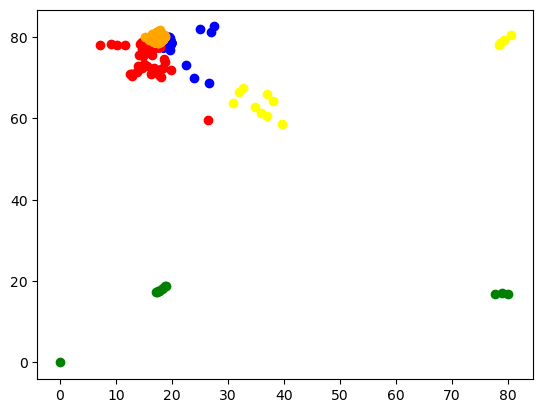

In [15]:
b = plt.subplot()

for i in range(0,7):
    b.scatter(lat[labels==i],lon[labels==i],color=colors[i])
    

plt.show()

In [87]:
lat.shape

(4281,)